In [ ]:
# Installing Pycaret
!pip install pycaret

Getting the Dataset from Pycaret Datasets

In [64]:
# Selecting the datset
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [65]:
# Shape of dataset
dataset.shape

(24000, 24)

Taking samples of data for testing and training

In [66]:
#  Sampling the dataset for training and testing
data = dataset.sample(frac=0.95, random_state=786)
data_test = dataset.drop(data.index)
data.reset_index(drop = True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [67]:
# Visualizing the data for training
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,270000,2,1,2,34,0,0,2,0,0,0,67544.0,54523.0,18865.0,44908.0,19508.0,15860.0,4025.0,5.0,34000.0,0.0,0.0,0.0,0
1,160000,2,1,2,42,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0
2,360000,2,1,2,30,0,0,0,0,0,0,139762.0,143515.0,147037.0,146117.0,145884.0,147645.0,6000.0,6000.0,4818.0,5000.0,5000.0,4500.0,0
3,20000,2,1,2,25,0,0,0,0,0,0,17776.0,18886.0,19551.0,18964.0,19676.0,20116.0,1700.0,1300.0,662.0,1000.0,747.0,602.0,0
4,70000,1,2,2,29,0,0,0,0,0,0,53700.0,53938.0,47852.0,48538.0,49034.0,49689.0,2200.0,8808.0,2200.0,2000.0,2000.0,2300.0,0


In [68]:
# Visualizing the data created for test purpose
data_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,100000,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
1,380000,1,2,2,32,-1,-1,-1,-1,-1,-1,22401.0,21540.0,15134.0,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
2,200000,2,2,1,32,-1,-1,-1,-1,2,-1,9076.0,5787.0,-684.0,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
3,200000,1,1,1,53,2,2,2,2,2,2,138180.0,140774.0,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
4,240000,1,1,2,41,1,-1,-1,0,0,-1,95.0,2622.0,3301.0,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0


In [69]:
# Size of data for training and testing
print(data.shape)
print(data_test.shape)

(22800, 24)
(1200, 24)


Setting up the Pycaret Environment

In [70]:
# Setting the evironment
from pycaret.classification import *
classific = setup(data=data, target='default', session_id=111)

,Description,Value
0,session_id,111
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Comaparing models

In [71]:
# Finding the best 3 models for deployement
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8219,0.0000,0.3531,0.6889,0.4664,0.3727,0.4030,0.053
gbc,Gradient Boosting Classifier,0.8214,0.7802,0.3599,0.6813,0.4705,0.3752,0.4031,5.774
lda,Linear Discriminant Analysis,0.8213,0.7648,0.3701,0.6734,0.4772,0.3804,0.4054,0.321
lightgbm,Light Gradient Boosting Machine,0.8185,0.7770,0.3758,0.6548,0.4772,0.3771,0.3985,0.472
ada,Ada Boost Classifier,0.8178,0.7714,0.3301,0.6813,0.4443,0.3507,0.3839,1.341
rf,Random Forest Classifier,0.8141,0.7616,0.3554,0.6426,0.4571,0.3562,0.3791,3.068
et,Extra Trees Classifier,0.8054,0.7384,0.3628,0.5975,0.4511,0.3414,0.3573,2.641
lr,Logistic Regression,0.7791,0.6394,0.0000,0.0000,0.0000,-0.0003,-0.0027,1.081
knn,K Neighbors Classifier,0.7501,0.6001,0.1754,0.3627,0.2364,0.1083,0.1185,1.094
dt,Decision Tree Classifier,0.7253,0.6118,0.4082,0.3845,0.3959,0.2184,0.2186,0.371


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=111, solver='auto',
                tol=0.001)

Ridge Classifier, Light Gradient Boosting Machine and Linear Discriminant Analysis are the best models.

Creating those models now:

# Ridge Model

In [72]:
# Creating ridge model
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8208,0.0,0.3399,0.6936,0.4563,0.3637,0.3969
1,0.8208,0.0,0.3399,0.6936,0.4563,0.3637,0.3969
2,0.8221,0.0,0.3626,0.6845,0.4741,0.3789,0.4067
3,0.8289,0.0,0.4034,0.6927,0.5099,0.4149,0.4371
4,0.8208,0.0,0.3381,0.6919,0.4542,0.3618,0.3951
5,0.8164,0.0,0.3693,0.6468,0.4702,0.3690,0.3902
6,0.8120,0.0,0.3153,0.6529,0.4253,0.3289,0.3601
7,0.8145,0.0,0.3295,0.6591,0.4394,0.3428,0.3724
8,0.8340,0.0,0.3835,0.7377,0.5047,0.4167,0.4489
9,0.8288,0.0,0.3494,0.7365,0.4740,0.3869,0.4254


In [73]:
# Tuning the model
ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8208,0.0,0.3371,0.6959,0.4542,0.3621,0.3962
1,0.8221,0.0,0.3428,0.6994,0.4601,0.3681,0.4018
2,0.8214,0.0,0.3654,0.6789,0.4751,0.3790,0.4055
3,0.8296,0.0,0.4062,0.6942,0.5125,0.4177,0.4398
4,0.8227,0.0,0.3409,0.7018,0.4589,0.3677,0.4020
5,0.8158,0.0,0.3665,0.6450,0.4674,0.3661,0.3875
6,0.8108,0.0,0.3153,0.6453,0.4237,0.3261,0.3561
7,0.8152,0.0,0.3295,0.6629,0.4402,0.3442,0.3744
8,0.8333,0.0,0.3807,0.7363,0.5019,0.4137,0.4462
9,0.8295,0.0,0.3523,0.7381,0.4769,0.3899,0.4281


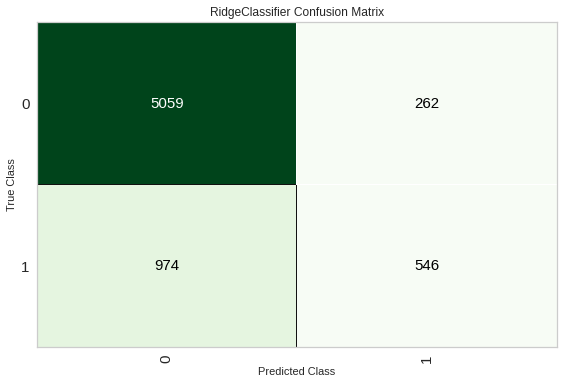

In [74]:
# Plotting the model
plot_model(ridge, plot='confusion_matrix')

In [75]:
# All plots available for the model
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# LGBM Model

In [76]:
# Creating the model
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8152,0.7702,0.3484,0.6543,0.4547,0.3557,0.3813
1,0.8177,0.7544,0.3711,0.6550,0.4738,0.3736,0.3956
2,0.8183,0.7996,0.3796,0.6537,0.4803,0.3794,0.4000
3,0.8252,0.7988,0.4261,0.6608,0.5181,0.4174,0.4324
4,0.8189,0.7693,0.3722,0.6583,0.4755,0.3761,0.3985
5,0.8145,0.7742,0.3892,0.6284,0.4807,0.3753,0.3913
6,0.8114,0.7487,0.3409,0.6349,0.4436,0.3423,0.3663
7,0.8102,0.7667,0.3551,0.6219,0.4521,0.3475,0.3674
8,0.8358,0.8027,0.4176,0.7206,0.5288,0.4378,0.4617
9,0.8176,0.7852,0.3580,0.6597,0.4641,0.3656,0.3904


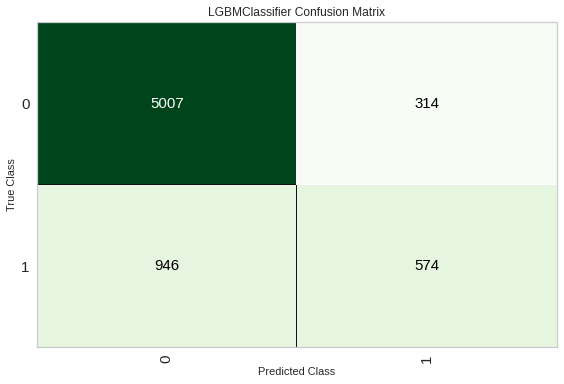

In [77]:
# Plotting the model
plot_model(lgbm, plot='confusion_matrix')

In [78]:
# All available plots for the model
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# LDA MODEL

In [79]:
# Creating the model
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8221,0.7637,0.3541,0.6906,0.4682,0.3744,0.4045
1,0.8221,0.7499,0.3683,0.6806,0.4779,0.3820,0.4082
2,0.8208,0.7865,0.3768,0.6683,0.4819,0.3836,0.4066
3,0.8264,0.7799,0.4176,0.6712,0.5149,0.4161,0.4335
4,0.8183,0.7561,0.3466,0.6703,0.4569,0.3608,0.3892
5,0.8158,0.7606,0.3864,0.6355,0.4806,0.3766,0.3938
6,0.8108,0.7307,0.3210,0.6420,0.4280,0.3294,0.3579
7,0.8145,0.7566,0.3494,0.6474,0.4539,0.3540,0.3784
8,0.8346,0.7895,0.4091,0.7200,0.5217,0.4308,0.4559
9,0.8276,0.7744,0.3722,0.7081,0.4879,0.3961,0.4257


In [80]:
# Tuning the model
lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8221,0.7654,0.3683,0.6806,0.4779,0.3820,0.4082
1,0.8221,0.7550,0.3909,0.6667,0.4929,0.3937,0.4144
2,0.8183,0.7900,0.3994,0.6438,0.4930,0.3896,0.4061
3,0.8308,0.7797,0.4460,0.6767,0.5377,0.4394,0.4538
4,0.8177,0.7628,0.3693,0.6533,0.4719,0.3718,0.3939
5,0.8177,0.7601,0.4062,0.6356,0.4957,0.3909,0.4055
6,0.8133,0.7373,0.3523,0.6392,0.4542,0.3528,0.3756
7,0.8145,0.7563,0.3693,0.6373,0.4676,0.3648,0.3847
8,0.8383,0.7955,0.4375,0.7196,0.5442,0.4529,0.4737
9,0.8238,0.7770,0.3807,0.6802,0.4882,0.3918,0.4159


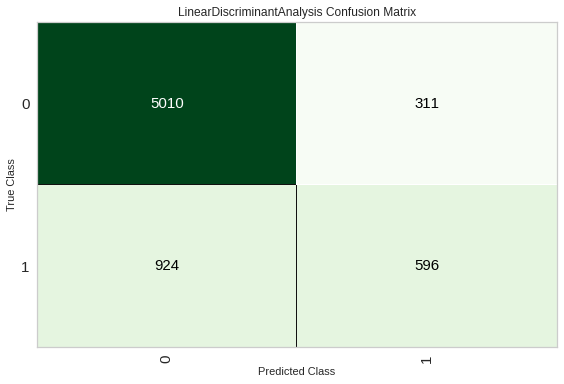

In [81]:
# Plotting the model
plot_model(lda, plot='confusion_matrix')

In [82]:
# All available plots for the model
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Comparing each model for their perfomance:

In [83]:
# Accuracy of the model for prediction
predict_model(ridge).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8193,0.655,0.3592,0.6757,0.4691,0.3723,0.3993


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_-2,PAY_2_0,...,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label
0,300000.0,64.0,1068.0,1168.0,1005.0,1372.0,1610.0,1355.0,1168.0,1005.0,1372.0,1610.0,1355.0,1426.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,70000.0,42.0,50886.0,51975.0,52527.0,53560.0,54653.0,55797.0,2200.0,2000.0,2500.0,2100.0,2200.0,2100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,50000.0,23.0,49860.0,50187.0,50022.0,20114.0,18777.0,18273.0,2500.0,1289.0,917.0,1315.0,5042.0,2512.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,200000.0,37.0,24779.0,8313.0,1951.0,1951.0,3124.0,3259.0,8318.0,1951.0,0.0,3124.0,3259.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,390000.0,44.0,169658.0,173758.0,177722.0,180132.0,184420.0,188329.0,8000.0,8000.0,6500.0,7000.0,7200.0,5500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [90]:
# Accuracy of the model for prediction
predict_model(lgbm).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8158,0.7714,0.3776,0.6464,0.4767,0.3742,0.3941


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_-2,PAY_2_0,...,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,300000.0,64.0,1068.0,1168.0,1005.0,1372.0,1610.0,1355.0,1168.0,1005.0,1372.0,1610.0,1355.0,1426.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9019
1,70000.0,42.0,50886.0,51975.0,52527.0,53560.0,54653.0,55797.0,2200.0,2000.0,2500.0,2100.0,2200.0,2100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7703
2,50000.0,23.0,49860.0,50187.0,50022.0,20114.0,18777.0,18273.0,2500.0,1289.0,917.0,1315.0,5042.0,2512.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9083
3,200000.0,37.0,24779.0,8313.0,1951.0,1951.0,3124.0,3259.0,8318.0,1951.0,0.0,3124.0,3259.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8818
4,390000.0,44.0,169658.0,173758.0,177722.0,180132.0,184420.0,188329.0,8000.0,8000.0,6500.0,7000.0,7200.0,5500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9421


In [91]:
# Accuracy of the model for prediction
predict_model(lda).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8195,0.7643,0.3921,0.6571,0.4911,0.3898,0.409


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_-2,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_-2,PAY_2_0,...,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,300000.0,64.0,1068.0,1168.0,1005.0,1372.0,1610.0,1355.0,1168.0,1005.0,1372.0,1610.0,1355.0,1426.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9091
1,70000.0,42.0,50886.0,51975.0,52527.0,53560.0,54653.0,55797.0,2200.0,2000.0,2500.0,2100.0,2200.0,2100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9737
2,50000.0,23.0,49860.0,50187.0,50022.0,20114.0,18777.0,18273.0,2500.0,1289.0,917.0,1315.0,5042.0,2512.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8977
3,200000.0,37.0,24779.0,8313.0,1951.0,1951.0,3124.0,3259.0,8318.0,1951.0,0.0,3124.0,3259.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8936
4,390000.0,44.0,169658.0,173758.0,177722.0,180132.0,184420.0,188329.0,8000.0,8000.0,6500.0,7000.0,7200.0,5500.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9450


From the observations, ridge model has the best accuarcy. Hence finalizing the same.

In [92]:
# Finalizing the best model
finalized_model = finalize_model(ridge)

Testing the model on test data

In [93]:
# Predicting values for the test data
predictions = predict_model(finalized_model, data_test)

In [94]:
# Checking the accuracy of the prediction
from pycaret.utils import check_metric
check_metric(predictions.Label, data_test.default, metric='Accuracy')

0.8108

Saving the model

In [95]:
# Saving the model
save_model(finalized_model, 'Binary Classification ridge model April 20 2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='default')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
        